# Manually clean cosmic rays and alpha particles

In [2]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [3]:
# Read a standard frame
#frame = 'r151'
frame = 'r160'
rstdhdus = fits.open(frame+'.fits')
# Unsigned to signed integer
rstd_img = rstdhdus[0].data
rstd_img.dtype = 'int16'

# Do the median filter
rstd_sm = scipy.signal.medfilt(rstd_img,21)  # This step takes longest
sigma = np.median(np.sqrt(rstd_img))  # assume Poisson
bad = (np.abs(rstd_img-rstd_sm)/sigma > 3.)
rstd_clean = rstd_img.copy()
rstd_clean[bad] = rstd_sm[bad]
#rstd_clean[bad] = np.median(r151_img)
#obj_start = 210
#obj_end = 246
obj_start = 212
obj_end = 244
rstd_clean[:,obj_start:obj_end+1] = rstd_img[:,obj_start:obj_end+1]

In [4]:
# Write
newframe = 'r9999'  # r999, frame r151
newhdu = fits.PrimaryHDU(data=rstd_clean,header=rstdhdus[0].header)
newhdus = fits.HDUList([newhdu])
newhdus.writeto(newframe+'.fits',overwrite=True)

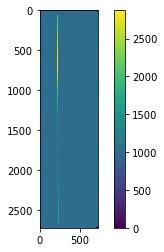

In [27]:
# Show 
%matplotlib inline
plt.imshow(rstd_clean)
plt.colorbar()

In [29]:
sigma

32.015621

In [5]:
test = fits.open('r9999.fits')
test[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  725                                                  
NAXIS2  =                 2725                                                  
CRVAL1U =                  409 / COLUMN ORIGIN                                  
CRVAL2U =                 3400 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  160 / OBSERVATION NUMBER                             
IDNUM   =                    5 / IMAGE ID                                       
UGEOM   =                    4 / UCAM READOUT GEOMETRY                          
DGEOM   =                   